In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Step 1: Data Collection
# Note: In Google Colab, you'll need to upload the dataset or provide a link
# For this example, assume the dataset is uploaded to Colab
# If you have a link to the dataset, you can use: df = pd.read_csv('URL_TO_CSV')
df = pd.read_csv('/content/drive/MyDrive/Internship/Electric Vehicle Sales by State in India _ ML _ FA _ DA projects/Electric Vehicle Sales by State in India.csv')
# Display basic dataset information
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 Rows:")
print(df.head())
print("\nDataset Info:")
df.info()

Dataset Shape: (96845, 8)

Columns: ['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity']

First 5 Rows:
     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to

In [4]:
# Step 2: Data Preprocessing
# Convert 'Year' to integer
df['Year'] = df['Year'].astype(int)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert categorical columns to category type
categorical_columns = ['Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
df[categorical_columns] = df[categorical_columns].astype('category')

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (if any)
# For numerical columns, fill with median
df['EV_Sales_Quantity'] = df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median())
# For categorical columns, fill with mode
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Verify no missing values remain
print("\nMissing Values After Handling:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of Duplicates:", df.duplicated().sum())
# Remove duplicates if any
df = df.drop_duplicates()



Missing Values:
Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

Missing Values After Handling:
Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

Number of Duplicates: 0


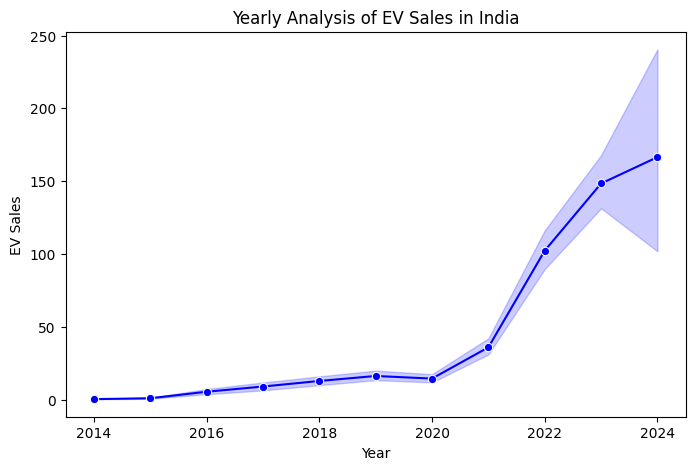

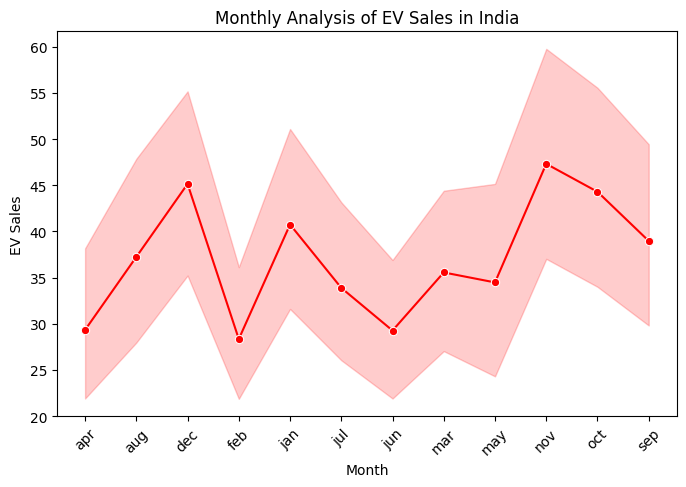

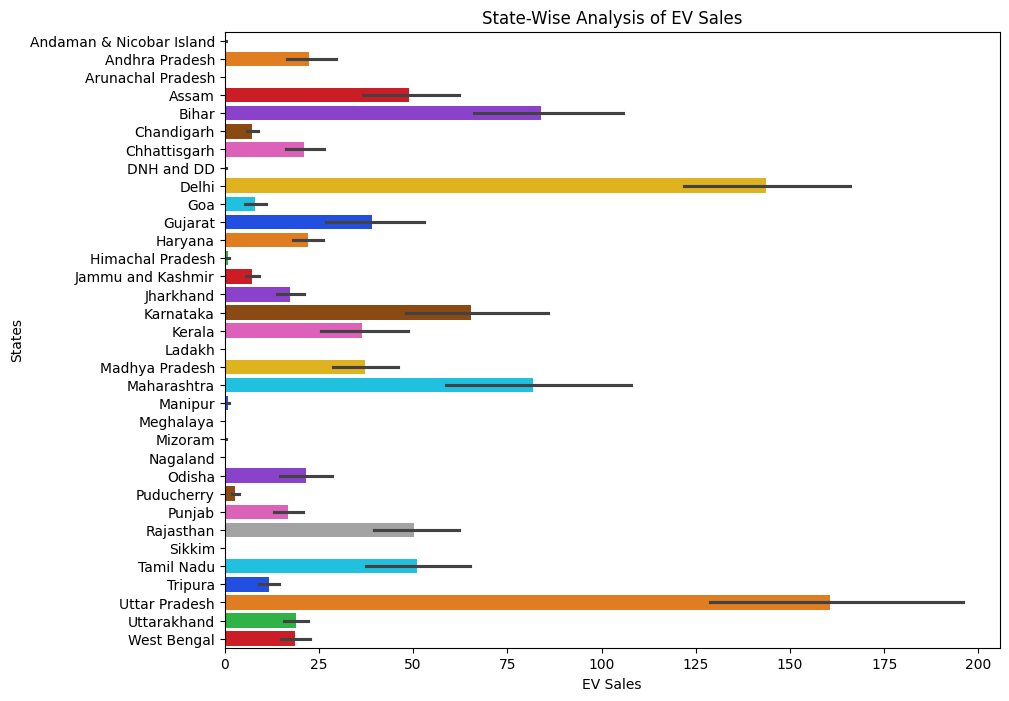

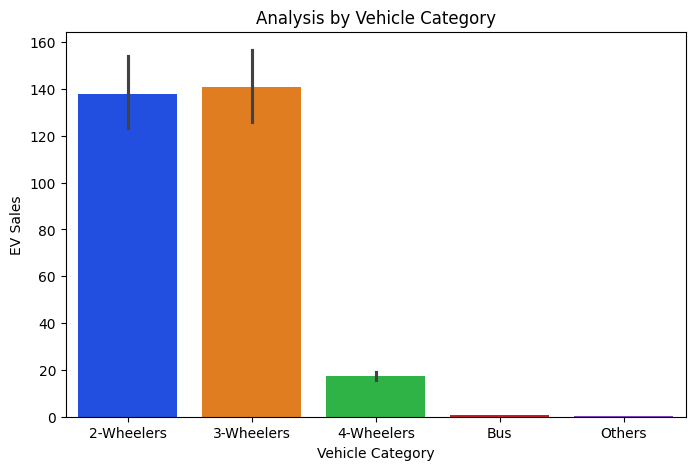

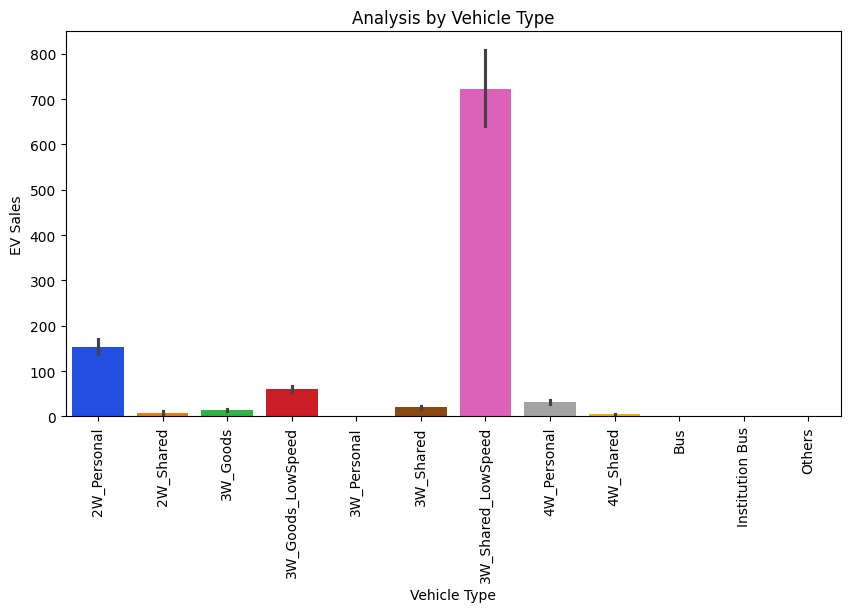

In [5]:
# Step 3: Exploratory Data Analysis (EDA)
# Yearly Analysis
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df, marker='o', color='b')
plt.title('Yearly Analysis of EV Sales in India')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.show()

# Monthly Analysis
plt.figure(figsize=(8, 5))
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df, marker='o', color='r')
plt.title('Monthly Analysis of EV Sales in India')
plt.xlabel('Month')
plt.ylabel('EV Sales')
plt.xticks(rotation=45)
plt.show()

# State-wise Analysis
plt.figure(figsize=(10, 8))
sns.barplot(y='State', x='EV_Sales_Quantity', data=df, hue='State', palette='bright')
plt.title('State-Wise Analysis of EV Sales')
plt.xlabel('EV Sales')
plt.ylabel('States')
plt.show()

# Vehicle Category Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df, hue='Vehicle_Category', palette='bright')
plt.title('Analysis by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales')
plt.xticks(rotation=0)
plt.show()

# Vehicle Type Analysis
plt.figure(figsize=(10, 5))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=df, hue='Vehicle_Type', palette='bright')
plt.title('Analysis by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.xticks(rotation=90)
plt.show()



In [6]:
# Step 4: Feature Engineering
# Extract Month and Day from Date
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'], drop_first=True)

# Drop unnecessary columns
df_encoded = df_encoded.drop(['Date', 'Month_Name'], axis=1)



In [7]:
# Step 5: Modeling
# Define features and target
X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



Root Mean Squared Error: 130.58175227721011


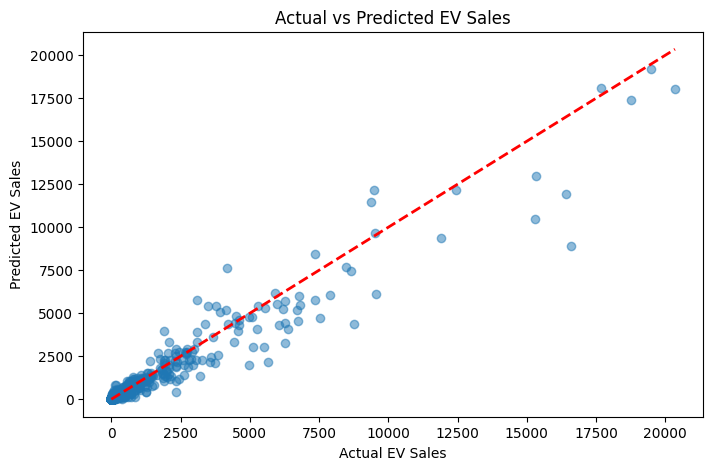

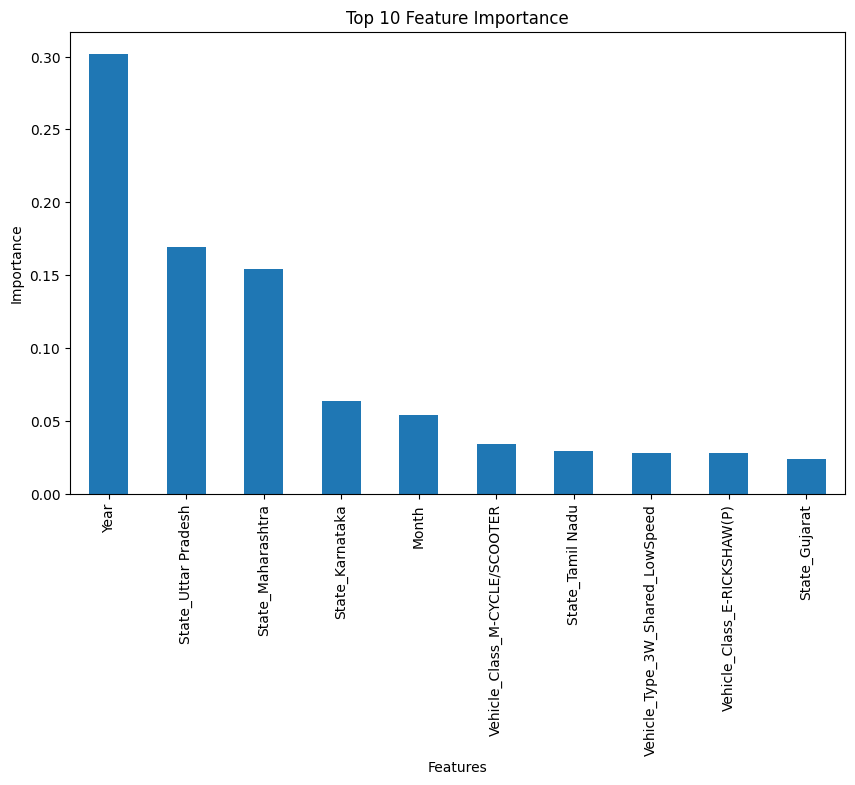

In [8]:
# Step 6: Model Evaluation
# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'\nRoot Mean Squared Error: {rmse}')

# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.show()

# Feature Importance
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X_train.columns).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
